<a href="https://colab.research.google.com/github/rohanvachhani/Convolutional-Neural-Network/blob/main/CNN_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#preparing data:  EXtract, Transform and Load

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms 

In [ ]:
torch.cuda.is_available()

True

In [ ]:
  train_set = torchvision.datasets.FashionMNIST(
      './data/FashionMNIST',
      train = True, 
      download = True,
      transform = transforms.Compose([
          transforms.ToTensor()   #convert all the images into pytorch tensors.
      ])

  )

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size = 10, shuffle = True)  #DataLoader gives us access to the data and manipulation capabilities
#default batch size is 1

In [ ]:
#just set the line width for oytorch output printed to the console
torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
#targets are labels in trainset(there are 10 classes) ; There are 60000 labels as we have 60000 train data
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#printing the number of samples in each class (here we have 10 output classes)
train_set.targets.bincount()
#each class has equal amount of data i.e 6000 (6000 X 10 = 60,000)
#all the classes are balanced here. Class imbalance is a major problem and can be solved by replicate the samples to balance. 

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
#observing the data samples in our train_set
sample = next(iter(train_set))     #using this we can access the single sample from train_set;  it is a (image data, label) tensor 
# print(sample)
print(len(sample))

2


AttributeError: ignored

In [ ]:
image, label =  sample
# print(label)        #int from 0 to 9 as we 10 classes
print(image.shape)    #gives: torch.Size([1, 28, 28])


torch.Size([1, 28, 28])


label:  9


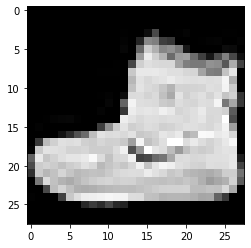

In [ ]:
#accessing individual image

#NOTE: have to squeeze the image tensor from [1x28x28] to [28x28] as pypot need a 2d array to draw
plt.imshow(image.squeeze(), cmap = 'gray')
print('label: ', label)

In [ ]:
#working with batches

batch_size = train_loader.batch_size
# print(batch_size)

batch = next(iter(train_loader))    #gives 1 bacth (i.e 10 data samples)
# print(batch)

images, labels = batch

print(images.shape)     #torch.Size([10, 1, 28, 28])
print(labels.shape)     #torch.Size([10])

torch.Size([10, 1, 28, 28])
torch.Size([10])


labels:  tensor([1, 3, 5, 2, 5, 3, 1, 3, 5, 0])


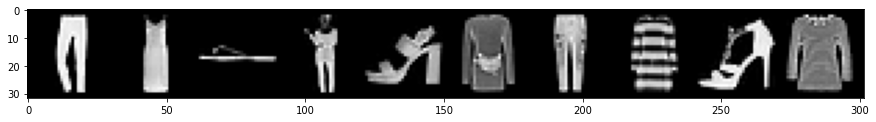

In [ ]:
#print all images in batch
import numpy as np
grid = torchvision.utils.make_grid(images, nrow=10)   #nrow specifies the number of the images in each row

plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels: ', labels)

In [ ]:
 #creat CNN class
import torch.nn as nn
import torch.nn.functional as F

 class Network(nn.Module):
   def __init__(self):
     super(Network, self).__init__()    #base Module class keep track of all the underneath weight; very helpful during the training process when weights will get updated.
     
     #pytoch NN class has 2 types of layers - liner and convolutional layers
     #here we'll use conv layer 

     #1 input channel as out image is rgb, output channel [see EXPLANATION], stride is 1 default and padding is 0 default
     #dimention of tensor: [10, 1, 28, 28] (as our input image dimension is 1x28x28 ; batch size is 10)
     self.conv1 = nn.Conv2d(in_channels=1,out_channels=6, kernel_size=5)   
     self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)      

     # Fully Connetected linear OR dense layers (flattaned from previous layer of conv)
     self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)     #4x4 is dimension of each of the 12 channels 
     self.fc2 = nn.Linear(in_features=120, out_features=60)
     self.out = nn.Linear(in_features=60, out_features=10)


     #EXPLANATION:
    #  kernal OR filer OR Convolutional filter : 

    #  hyper parameteres:
    #  kernel_size, out_channels , out_featuers  

    # data dependent hyperparameters:
    # in_channels and in_features and out_feature(in final output layer)

    # learnable parameters(whose values are learned durind the trainnig phase by model)

    #  no. of output channels are result of applying filter(kernal) on it. 1 filter gives 1 output channel. 
    #  So, if we specify out_channels=6 means that we want 6 filters in this layer which produce 6 output channels

    # output channels are also knowns as feature maps. however, as these output channels are single dimensional tensor in linear layers, at there they are just known as features.


      

   def forward(self, t):        #forward method is must to provide in neural network impl. It is the actual transformation of input tensor (t). It is a forward pass.
     #implement the forward pass in this method

     #here our input tensor is transformed as we move through our layers

     #1st input layer 
     t = t
     #after : shape of t : [10, 1, 28, 28]

     #2nd : hidden convolutional layer 1
     t = self.conv1(t)
     #after conv1: shape of t : [10, 6, 24, 24]
     t = F.relu(t)    
     #after relu: shape of t : [10, 6, 24, 24]                              #RELU activation and MAX POOL operations does not have weights in in so, we use these layers directly from NN.Functional package
     t = F.max_pool2d(t, kernel_size=2, stride=2)
     #after maxppol2d: shape of t : [10, 6, 12, 12]     how? 28x28 becomes 14x14 : [(width_of_input-kernal_size+padding) / stride] +1 => [(28-2+0)/2]+1 = 14

     #3rd : hidden convolutional layer 2
     t = self.conv2(t)
     #after conv2: shape of t : [10, 12, 8, 8]
     t = F.relu(t)
     #after relu: shape of t : [10, 12, 8, 8]
     t = F.max_pool2d(t, kernel_size=2, stride=2)         #default value of stride is equals to the kernefl size
     #after maxpool2d: shape of t : [10, 12, 4, 4]     how? 14x14 becomes 14x14 : [(width_of_input-kernal_size+padding) / stride] +1 => [(14-2+0)/2]+1 = 1f4


     #4th : 1st fully connected Linear layer 

     # First we have to reshape our tensor (flattened out tensor for linear layer)
     t = t.reshape(-1, 12*4*4)
     t = self.fc1(t)
     t = F.relu(t)

     #5th : 2nd fully connected Linear layer 
     t = self.fc2(t)
     t = F.relu(t)
     
     #6th : 3nd fully connected Linear layer - Final output layer
     t = self.out(t)
     # t = F.softmax(t, dim = 1)          #softmax activation function returns positive probabilities for each classes. These probabilitis summed 1
     # we do not need to use this activation function here, as we gonna use the loss function (in CROSSENTROPYLOSS function) during training at that time softmax implicitly gonna called by 
     
     return t

    


  #HOW THIS FORWARD METHOD IS INVOKED?
    # Evert layer we defined is an object of NN module, when we call for ex: conv1(input) it actually invokes a special _call_(input) method and
    # this _call_(input) method is implemented by pytorch and it then calls forward(input method)
    # this applies to pytorch nn modules such as networks and layers 



In [ ]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [ ]:
 #acceess any layers from network object
print(network.conv1)
print(network.out)

In [ ]:
#access the weights of any layer
print(network.conv1.weight.shape)   
print(network.conv2.weight.shape)
print(network.fc1.weight.shape)
print(network.fc2.weight.shape)
print(network.out.weight.shape)

torch.Size([6, 1, 5, 5])
torch.Size([12, 6, 5, 5])
torch.Size([120, 192])
torch.Size([60, 120])
torch.Size([10, 60])


In [ ]:
torch.set_grad_enabled(False)

In [ ]:
network = Network() 
sample = next(iter(train_set))       #next iter on train_set gives 1 data; on train_loader gives 1 batch

image, label = sample

  #we have got a single data row i.e a single image and its label
  #HOWEVER, OUR NETWORK NEED A BATCH IN IT  
  #we can create bacth from our  single image ([1x28x28]) 

# print(image.unsqueeze(0).shape)     #torch.Size([1, 1, 28, 28]) - [batch_size X channels X height X width] : batch size is 1 now and this can be passes as our input tensor t in our Network class

t = image.unsqueeze(0)
pred = network(image.unsqueeze(0))

print("prediction shape: ", pred.shape)   #torch.Size([1, 10])
print(label)
# plt.imshow(image.squeeze(), cmap='gray')


prediction shape:  torch.Size([1, 10])
9


In [ ]:
print(pred)                        #here the prediction tensor [1x10] containts prected values for each class for our input images. which class has highest probabiblity it is given as our output.

print(F.softmax(pred, dim=1))      #softmax activation operation, makes the negative values of prediction to positive one.
print(pred.argmax(dim=1))          #gives the maximam value from out 1x10 prediction tensor. Here the class 0(it chanegs everytime we run!) has the highest value 
#here the prediction is class 0 however it is actually 9(as the value of label is 9) This is because out model is not trained enough, so it cannot predict the with good accuracy. !

print(F.softmax(pred, dim=1).sum())#sum of all the probabilities is 1 

tensor([[-0.1235, -0.0104,  0.0136, -0.0764, -0.1123, -0.0395,  0.0377,  0.1100,  0.1113, -0.0671]],
       grad_fn=<AddmmBackward>)
tensor([[0.0895, 0.1002, 0.1026, 0.0938, 0.0905, 0.0973, 0.1051, 0.1130, 0.1132, 0.0947]], grad_fn=<SoftmaxBackward>)
tensor([8])
tensor(1.0000, grad_fn=<SumBackward0>)


In [ ]:
#Now we gonna do the Batch Processing

torch.set_grad_enabled(True) # we now need to changenthe weights, for that gradient tracking is necessary

batch = next(iter(train_loader))

images, labels = batch

preds = network(images)
print(preds.shape)      #torch.Size([10, 10])
preds                   #10 tensors for 10 images, evry tensor contains 9 predictions for an image.

torch.Size([10, 10])


tensor([[-0.1338, -0.0032,  0.0088, -0.0941, -0.1094, -0.0376,  0.0447,  0.1044,  0.1128, -0.0631],
        [-0.1203, -0.0091,  0.0092, -0.0708, -0.1125, -0.0359,  0.0407,  0.1124,  0.1165, -0.0555],
        [-0.1243, -0.0085,  0.0124, -0.0657, -0.1070, -0.0386,  0.0336,  0.1191,  0.1261, -0.0599],
        [-0.1215, -0.0125,  0.0112, -0.0834, -0.1134, -0.0356,  0.0446,  0.1113,  0.1095, -0.0530],
        [-0.1311, -0.0059,  0.0081, -0.0852, -0.1114, -0.0368,  0.0437,  0.1079,  0.1136, -0.0622],
        [-0.1254, -0.0094,  0.0149, -0.0815, -0.1213, -0.0446,  0.0315,  0.1075,  0.1222, -0.0688],
        [-0.1262, -0.0086,  0.0164, -0.0808, -0.1110, -0.0371,  0.0438,  0.1102,  0.1181, -0.0649],
        [-0.1255, -0.0042,  0.0234, -0.0772, -0.1137, -0.0416,  0.0427,  0.1100,  0.1249, -0.0600],
        [-0.1269, -0.0048,  0.0128, -0.0803, -0.1115, -0.0343,  0.0424,  0.1103,  0.1164, -0.0567],
        [-0.1265, -0.0043,  0.0124, -0.0846, -0.1093, -0.0348,  0.0444,  0.1071,  0.1121, -0.0592]],

In [ ]:
 preds.argmax(dim=1)    #it gives max values from each 10 tensors (interpretation : in bactch of 10 images, for image 1, our model has predicted that it is class8 (Bag); 
                        #same for image 8 our model has predicted class7(snesker) 

                        #:::::::::::NOTE::::::::::::
                        #prediction can change next time we run the model

tensor([8, 8, 8, 7, 8, 8, 8, 8, 8, 8])

In [ ]:
labels          #But actual labels 

tensor([1, 2, 5, 5, 3, 7, 9, 7, 3, 2])

In [ ]:
#we compare the model's prediction with actual label value(As we are doing supervised learning)
preds.argmax(dim=1).eq(labels).sum()          #it gives the number how many images from this batch got correct prediction
#eq function calculate argument vise equal function and fives number how many argumenrs are queual in tensor

tensor(0)

In [ ]:
#we gonna make this as a function
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
get_num_correct(preds, labels)

0

In [ ]:
#THE TRAINING PROCESS

# torch.is_grad_enabled

import torch.optim as optim

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
batch = next(iter(train_loader))
# print(len(batch[0]))
images, labels  = batch

preds = network(images)

# print(get_num_correct(preds, labels))

#calculating loss
loss = F.cross_entropy(preds, labels)
print(loss.item())    #loss should be decreased as we train our model

print("weights on conv1: ", network.conv1.weight.grad)      #no gradienrts is calculated yet
#backward is the back propogation phase where pytorch calculate error(it is diffential error delta), calculate weight change, and update the weights
loss.backward()                                                  #calculating gradients(errors)(i.e similar to delta in NN)

print("weights on conv1: ", network.conv1.weight.grad.shape)      #gradients are now calculated. 
#weights are updates and they tracked in grad

#now we gonna update the weights
optimizer = optim.Adam(network.parameters(),lr = 0.01)         #(same in NN, :: delta weight = (lr)*(delta(here, gradient)*(input value) )
optimizer.step()                                              #Update the weights (weight = weight + delta weight)


14
2.3029935359954834
weights on conv1:  None
weights on conv1:  torch.Size([6, 1, 5, 5])


In [ ]:
#now if check that first batch again we shoud now have decresed a loss and should possiblly increased the correct predictions
pred = network(images)

loss = F.cross_entropy(preds, labels)
print(loss)

get_num_correct(preds, labels)

tensor(2.3030, grad_fn=<NllLossBackward>)


14

In [ ]:
#TRAINING EPOCHS WITH COMPLETE TRAINING DATA
import torch 
import torchvision
import torchvision.transforms as transforms 
import torch.optim as optim


train_set = torchvision.datasets.FashionMNIST(
    
      './data/FashionMNIST',
      train = True, 
      download = True,
      transform = transforms.Compose([
          transforms.ToTensor()   #convert all the images into pytorch tensors.
      ])

  )
 
 
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01) 


for epoch in range(13):    #10 ephochs

  total_loss = 0
  total_correct = 0 
    
  for batch in train_loader:
    images, labels = batch          #100 imsages and labels (as our batch size is 100)

    preds = network(images)
    loss = F.cross_entropy(preds, labels)       #calculating lossl;  gradients(errors)  #(same in NN, ::delta in NN)
  
    optimizer.zero_grad()                       #zero out the grediant calaculates in previous iteratios as pytorch defaultly accumulate those previous gradients and add this to in current if not zeroed out.
    loss.backward()                             #calculate gradient(errors)     #(same in NN, :: delta weight = (lr)*(delta(here, gradient)*(input value) )
    optimizer.step()                            #update weights                 #(same in NN, :: weight = weight + delta weight)
    
    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

  print(f"Epoch {epoch+1}: Total number of correct: {total_correct} and loss: {total_loss}")  



Epoch 0: Total number of correct: 47934 and loss: 322.8576713502407
Epoch 1: Total number of correct: 51801 and loss: 223.91757340729237
Epoch 2: Total number of correct: 52419 and loss: 206.01660834252834
Epoch 3: Total number of correct: 52716 and loss: 196.75407744944096
Epoch 4: Total number of correct: 52878 and loss: 192.41744656860828
Epoch 5: Total number of correct: 53062 and loss: 187.83274484425783
Epoch 6: Total number of correct: 53203 and loss: 184.48510652780533
Epoch 7: Total number of correct: 53166 and loss: 184.04395633935928
Epoch 8: Total number of correct: 53352 and loss: 179.66864298284054
Epoch 9: Total number of correct: 53426 and loss: 178.99144619703293
Epoch 10: Total number of correct: 53460 and loss: 178.00480976700783
Epoch 11: Total number of correct: 53473 and loss: 178.2304106876254
Epoch 12: Total number of correct: 53527 and loss: 175.3594806790352


In [ ]:

\